# Questions to Explore
1. What was the most contributing event that student was involved at the County College of Morris and/or with the Department of Information Technologies prior to enrollling in CCM?
2. Also I would like to see that pursuing a specific program is related to a past experience that made student enroll in Computer Science or any specific motivation related to a program?
3. Are their specific age range that is mostly taking the computer sciecne course? (Answered)
4. What past expireiences does drive student to pursue a computer major/certificate?
5. Which major students mostly pursue computer sciecne courses? (Answered)
6. Distribtuin of majors among ethinicities?
7. Distribution of ethnicity among students taking computer science? (Answered)
8. How likely students with a particular race, gender and major take the computer class again according the interest scale? (Answered)

In [4]:
import pandas as pd
import math
import statistics as stats
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#upload cleaned data to python using panda 
unique_columns= pd.read_csv('C:/Users/Hamza/Downloads/clean_entry_survey.csv')

In [6]:
#check all the cloumns in the data
unique_columns.columns

Index(['Unnamed: 0', 'Marketed Channel (CCM Website)',
       'Marketed Channel (Social Media)', 'Marketed Channel (Community Event)',
       'Marketed Channel (Family member or friend)',
       'Marketed Channel (Current CCM student)',
       'Marketed Channel (CCM alumni)',
       'Marketed Channel (High School Teacher)',
       'Marketed Channel (High School Counselor)',
       'Marketed Channel (In-app advertisement)', 'How You Heard (Employer)',
       'How You Heard (Billboard)', 'How You Heard (Television)',
       'How You Heard (Radio)', 'How You Heard (Home Mailer)',
       'How You Heard (Other)', 'Impact (Affordable Cost)',
       'Impact (Location/Convenience)', 'Impact (Choice of Programs)',
       'Impact (Online Offerings)', 'Impact (Family/Friend Referral)',
       'Impact (Faculty/Staff)', 'Impact (College Reputation)',
       'Impact (Financial Aid)', 'Impact (Scholarships)',
       'Impact (Small Class Sizes)', 'Impact (Extra-curricular Opportunities)',
       'Impa

In [7]:
#try grouping maket channels with Age to see distribution of market channels among the age category (Unscuccessful)
market_channels = unique_columns[['Marketed Channel (CCM Website)', 'Marketed Channel (Social Media)', 'Marketed Channel (Community Event)', 'Marketed Channel (Current CCM student)', 'Marketed Channel (Family member or friend)', 'Marketed Channel (CCM alumni)', 'Marketed Channel (High School Teacher)', 'Marketed Channel (High School Counselor)', 'Marketed Channel (In-app advertisement)']]

age_range_groups = unique_columns.groupby('Age ')[market_channels.columns].sum()

print(age_range_groups)



                                   Marketed Channel (CCM Website)  \
Age                                                                 
18 and younger  NoNoYesDon't recallYesNoNoYesNoNoNoNoNoNoNoYes...   
19-20           YesNoYesNoNoNoNoNoYesNoNoNoNoYesYesYesYesNoYes...   
21-24           YesNoDon't recallNoNoYesNoNoNoNoNoYesNoNoYesDo...   
25-34           NoYesNoNoDon't recallNoDon't recallNoNoDon't r...   
35-64           NoNoYesNoYesYesDon't recallYesNoNoYesDon't rec...   
65+                                              Don't recallNoNo   

                                  Marketed Channel (Social Media)  \
Age                                                                 
18 and younger  NoNoNoDon't recallDon't recallNoNoDon't recall...   
19-20           YesNoYesNoNoYesNoNoYesNoYesNoNoNoNoNoYesNoNoNo...   
21-24           YesNoNoNoNoYesNoNoYesNoNoYesNoNoNoDon't recall...   
25-34           NoNoNoNoDon't recallYesDon't recallNoNoDon't r...   
35-64           NoNoDon't recallN

## Distribution of Age for Students taking Computer Scinece Courses

In [29]:
# Group by 'Age ' and count occurrences
age_groups = unique_columns['Age '].value_counts()
print(age_groups)
# Calculate the percentage of each age group
age_percentages = (age_groups / age_groups.sum()) * 100
print(age_percentages)

Age 
18 and younger    166
19-20             137
21-24              83
25-34              43
35-64              21
65+                 3
Name: count, dtype: int64
Age 
18 and younger    36.644592
19-20             30.242826
21-24             18.322296
25-34              9.492274
35-64              4.635762
65+                0.662252
Name: count, dtype: float64


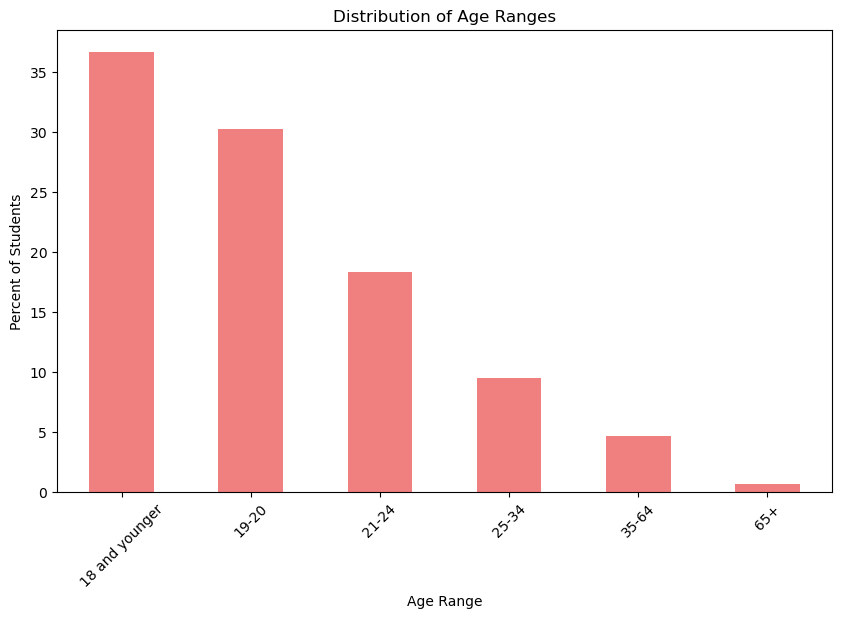

In [30]:
# Create a bar chart for Age 
plt.figure(figsize=(10, 6))
age_percentages.plot(kind='bar', color='lightcoral')
plt.title('Distribution of Age Ranges')
plt.xlabel('Age Range')
plt.ylabel('Percent of Students')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

#display count of students
for i, v in enumerate(age_groups):
    ax.text(i, v, str(v), ha='center', va='bottom')

# Show the bar chart
plt.show()


## Distribution of Ehtnincity for students taking Computer Science courses

In [38]:
#delete the unknowns first
unique_columns = unique_columns[unique_columns['Race/ethnicity'] != 'Unknown']

# Group by 'Race/ethnicity' and count occurrences
race_groups = unique_columns['Race/ethnicity'].value_counts()
print(race_groups)

# Calculate the percentage of each race/ethnicity
race_percentages = (race_groups / race_groups.sum()) * 100
print('Percentage:\n', race_percentages)



Race/ethnicity
White                     201
Hispanic                   81
Multi-Racial               64
Asian                      62
Black/African American     17
Native American             3
Name: count, dtype: int64
Percentage:
 Race/ethnicity
White                     46.962617
Hispanic                  18.925234
Multi-Racial              14.953271
Asian                     14.485981
Black/African American     3.971963
Native American            0.700935
Name: count, dtype: float64


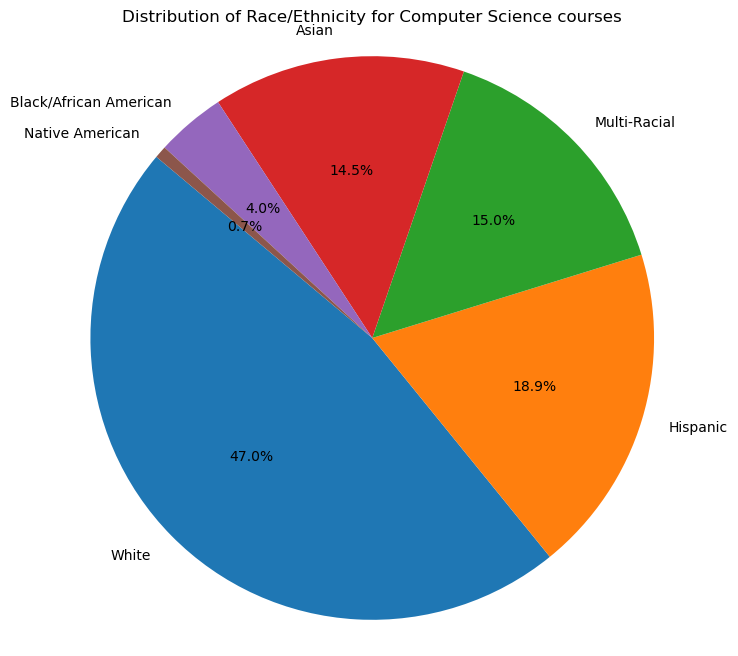

In [39]:
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(race_groups, labels=race_groups.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Race/Ethnicity for Computer Science courses')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()


# Condense the Majors to more broader categories

In [41]:
unique_columns['Major'].unique()



array(['STEM', nan, 'Business', 'Healthcare', 'Social Science',
       'Humanities', 'Undecided', 'Criminal Justice ', 'Arts', 'Language'],
      dtype=object)

In [13]:
# Define a mapping dictionary for major categories
majors= {
    'Computer Science': 'STEM',
    'Business': 'Business',
    'Nursing': 'Healthcare',
    'Social Science': 'Social Science',
    'Science': 'STEM',
    'IT': 'STEM',
    'Engineering': 'STEM',
    'Radiography': 'Healthcare',
    'History': 'Humanities',
    'Undecided': 'Undecided',
    'Criminal Justice': 'Social Science',
    'Game Development': 'STEM',
    'Architecture': 'STEM',
    'Photography': 'Arts',
    'Data Analytics': 'STEM',
    'Math & Science': 'STEM',
    'EDAM': 'Undecided',
    'Cybersecurity': 'STEM',
    'Game Design': 'STEM',
    'Exercise Science': 'Healthcare',
    'ESL': 'Language',
    'Graphic Design': 'Arts',
    'Psychology': 'Social Science',
    'Undecied' : 'Undecided',
    'Soicial Science' :'Social Science'
}

# Replace specific majors with broader categories
unique_columns['Major'] = unique_columns['Major'].replace(majors)


In [55]:
# Group by 'Major' and count occurrences
major_counts = unique_columns['Major'].value_counts()
print(major_counts)
# Calculate the percentage of each major
major_percentages = (major_counts/ major_counts.sum()) * 100


Major
STEM                 266
Business              19
Social Science        16
Healthcare             5
Undecided              4
Criminal Justice       2
Arts                   2
Humanities             1
Language               1
Name: count, dtype: int64


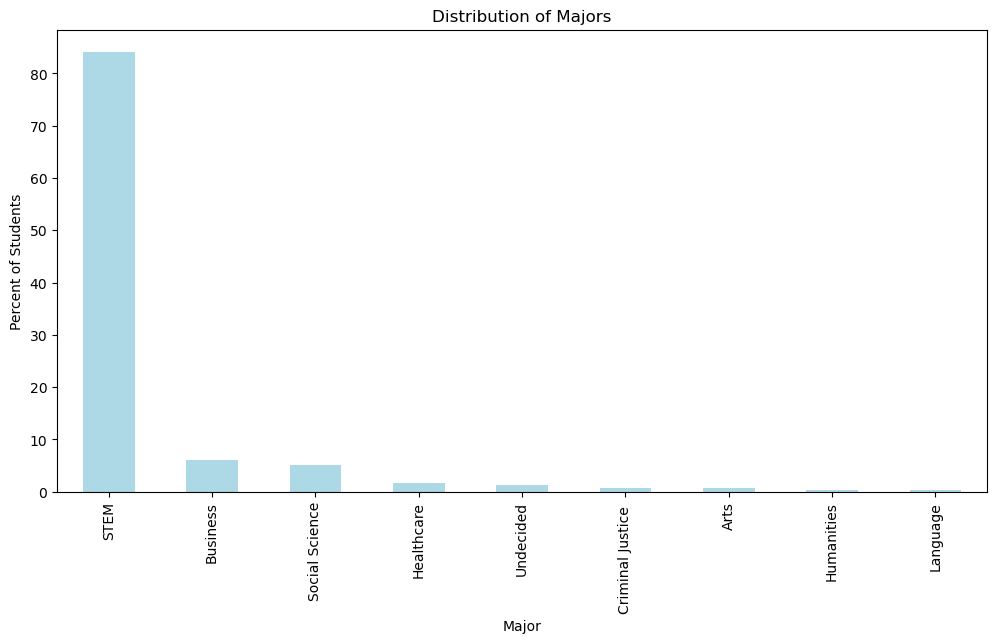

In [54]:
# Calculate the count of students in each major
major_counts = unique_columns['Major'].value_counts()

# Calculate the percentage of students in each major
major_percentages = (major_counts / major_counts.sum()) * 100

# Create a bar chart
plt.figure(figsize=(12, 6))
ax = major_percentages.plot(kind='bar', color='lightblue')
plt.title('Distribution of Majors')
plt.xlabel('Major')
plt.ylabel('Percent of Students')

plt.show()



# Distribution of Mojor by Ethincities among student taking Computer Science courses

In [59]:
# Filter the data for African American students
african_american_data = unique_columns[unique_columns['Race/ethnicity'] == 'Black/African American']

# Group the data by the ' Major' column and count occurrences
african_american_major_counts = african_american_data['Major'].value_counts()

print(african_american_major_counts)

# Calculate the percentage of African American students in each major
african_american_major_percentages = (african_american_major_counts / african_american_major_counts.sum()) * 100


Major
STEM              11
Business           3
Social Science     1
Name: count, dtype: int64


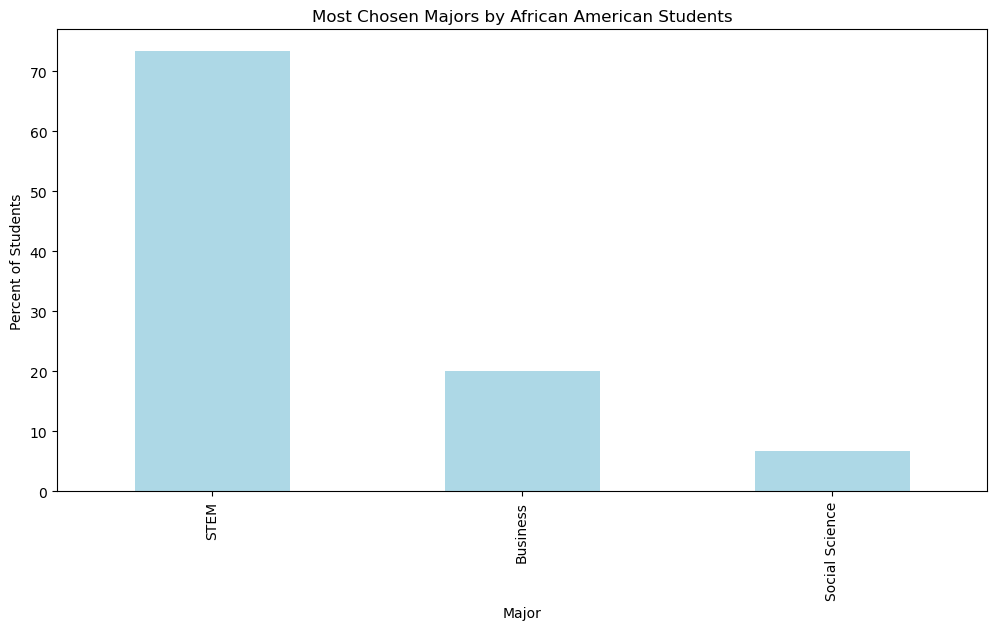

In [60]:

# Create a bar chart
plt.figure(figsize=(12, 6))
african_american_major_percentages.plot(kind='bar', color='lightblue')
plt.title('Most Chosen Majors by African American Students')
plt.xlabel('Major')
plt.ylabel('Percent of Students')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Show the bar chart
plt.show()


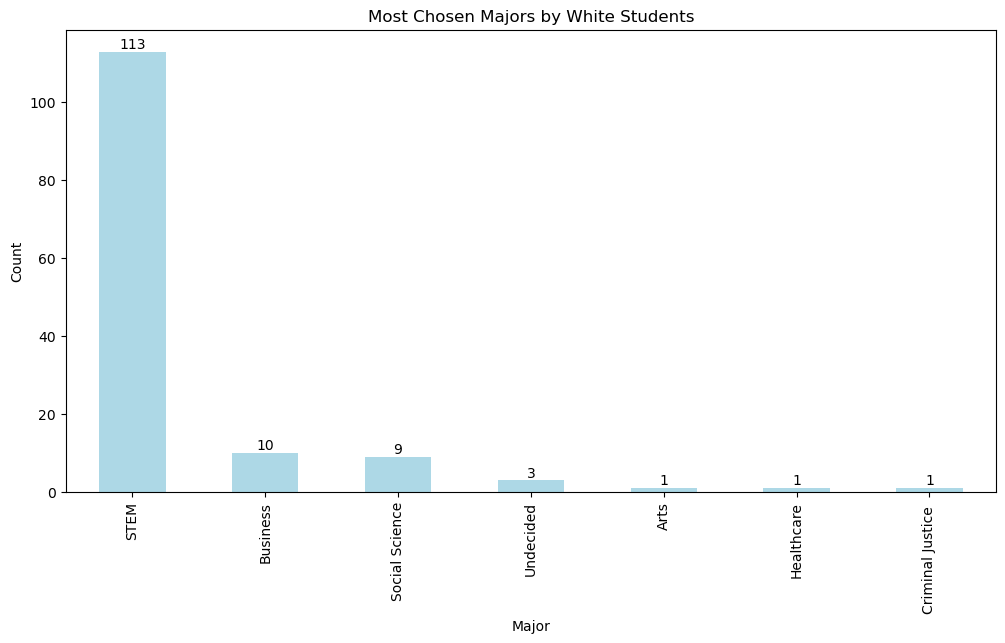

In [49]:
# Filter the data for White students
white_data = unique_columns[unique_columns['Race/ethnicity'] == 'White']

# Group the data by the 'Major' column and count occurrences
major_counts = white_data['Major'].value_counts()

# Create a bar chart
plt.figure(figsize=(12, 6))
ax = major_counts.plot(kind='bar', color='lightblue')
plt.title('Most Chosen Majors by White Students')
plt.xlabel('Major')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Add count labels on the bars
for i, v in enumerate(major_counts):
    ax.text(i, v, str(v), ha='center', va='bottom')

# Show the bar chart
plt.show()



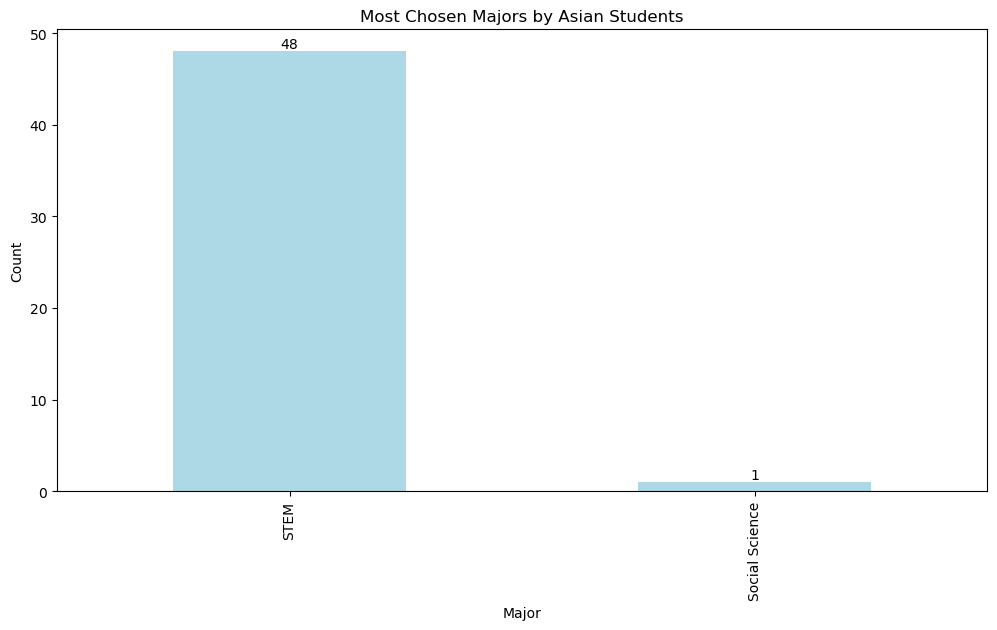

In [25]:
# Filter the data for Asian students
asian_data = unique_columns[unique_columns['Race/ethnicity'] == 'Asian']

# Group the data by the 'Major' column and count occurrences
major_counts = asian_data['Major'].value_counts()

# Create a bar chart
plt.figure(figsize=(12, 6))
ax = major_counts.plot(kind='bar', color='lightblue')
plt.title('Most Chosen Majors by Asian Students')
plt.xlabel('Major')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Add count labels on the bars
for i, v in enumerate(major_counts):
    ax.text(i, v, str(v), ha='center', va='bottom')

# Show the bar chart
plt.show()


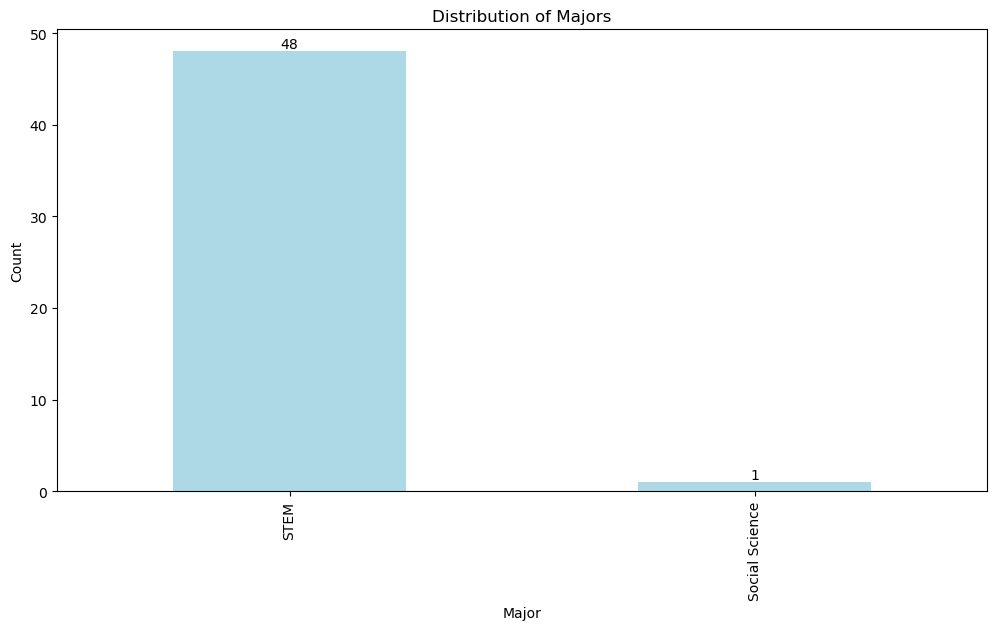

In [18]:

# Create a bar chart
plt.figure(figsize=(12, 6))
ax = major_counts.plot(kind='bar', color='lightblue')
plt.title('Distribution of Majors')
plt.xlabel('Major')
plt.ylabel('Count')

# Add count labels on the bars
for i, v in enumerate(major_counts):
    ax.text(i, v, str(v), ha='center', va='bottom')

# Show the bar chart
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


# Distribution of Gender for Students enrolled in Computer Scinec courses

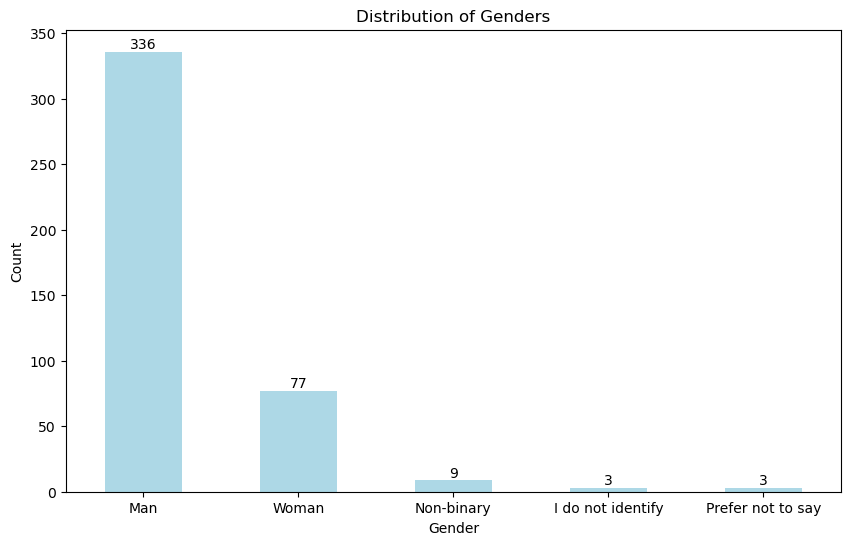

In [61]:
# Group the data by the 'Gender' column and count occurrences
gender_counts = unique_columns['Gender'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
ax = gender_counts.plot(kind='bar', color='lightblue')
plt.title('Distribution of Genders')
plt.xlabel('Gender')
plt.ylabel('Count')

# Add count labels on the bars
for i, v in enumerate(gender_counts):
    ax.text(i, v, str(v), ha='center', va='bottom')

# Show the bar chart
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()


# Distribution of Interest Scale

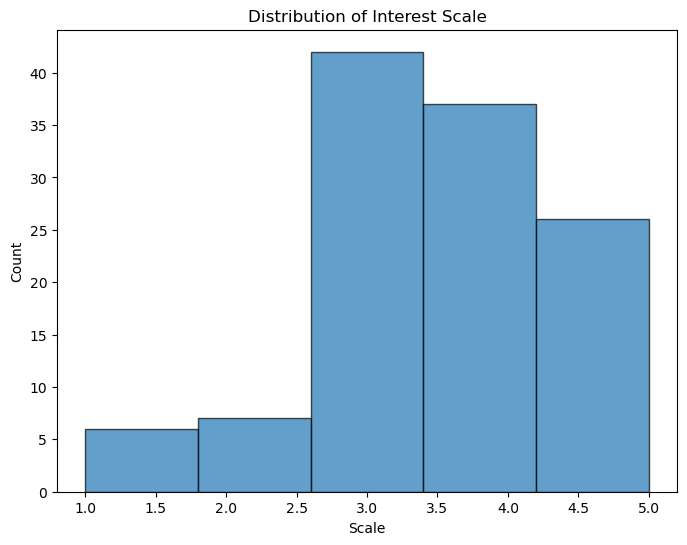

Average Scale (Entire Dataset): 3.593220338983051


In [21]:
# Create a histogram for the 'Scale' column
plt.figure(figsize=(8, 6))
plt.hist(unique_columns['Scale'], bins=5, edgecolor='k', alpha=0.7)
plt.title('Distribution of Interest Scale (0-unlikely-5-highly likely')
plt.xlabel('Scale')
plt.ylabel('Count')
plt.show()

# Calculate the average for the entire dataset
average_scale = unique_columns['Scale'].mean()
print('Average Scale (Entire Dataset):', average_scale)



# Interest of Conputer Scinece courses Statisitcs among Ethnicities and Gender

In [22]:
# Calculate the average for each race/ethnicity
race_averages = unique_columns.groupby('Race/ethnicity')['Scale'].mean()
print('Average Scale by Race/Ethnicity:\n', race_averages)

Average Scale by Race/Ethnicity:
 Race/ethnicity
Asian                     4.384615
Black/African American    3.500000
Hispanic                  3.818182
Multi-Racial              3.090909
Native American                NaN
Unknown                   3.625000
White                     3.435484
Name: Scale, dtype: float64


In [23]:
# Calculate the average for each gender
gender_averages = unique_columns.groupby('Gender')['Scale'].mean()
print('Average Scale by Gender:\n', gender_averages)

Average Scale by Gender:
 Gender
I do not identify    3.500000
Man                  3.648352
Non-binary           4.000000
Prefer not to say    3.666667
Woman                3.263158
Name: Scale, dtype: float64
